# Yield prediction


## Introducere

## Import-uri

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV

## Citirea fisierului Csv care contine baza de date 

In [2]:
df=pd.read_csv("crop_yield.csv")
df

Region Soil_Type     Crop  Rainfall_mm  Temperature_Celsius  \
0        West     Sandy   Cotton   897.077239            27.676966   
1       South      Clay     Rice   992.673282            18.026142   
2       North      Loam   Barley   147.998025            29.794042   
3       North     Sandy  Soybean   986.866331            16.644190   
4       South      Silt    Wheat   730.379174            31.620687   
...       ...       ...      ...          ...                  ...   
999995   West      Silt     Rice   302.805345            27.987428   
999996  South    Chalky   Barley   932.991383            39.661039   
999997  North     Peaty   Cotton   867.362046            24.370042   
999998   West      Silt    Wheat   492.812857            33.045505   
999999   West     Sandy    Maize   180.936180            27.298847   

        Fertilizer_Used  Irrigation_Used Weather_Condition  Days_to_Harvest  \
0                 False             True            Cloudy              122   
1                  True             True             Rainy              140   
2                 False            False             Sunny              106   
3                 False             True             Rainy              146   
4                  True             True            Cloudy              110   
...                 ...              ...               ...              ...   
999995            False            False             Sunny               76   
999996             True            False             Rainy               93   
999997             True            False            Cloudy              108   
999998            False            False             Sunny              102   
999999             True            False             Sunny               76   

        Yield_tons_per_hectare  
0                     6.555816  
1                     8.527341  
2                     1.127443  
3                     6.517573  
4                     7.248251  
...                        ...  
999995                1.347586  
999996                7.311594  
999997                5.763182  
999998                2.070159  
999999                2.937243  

[1000000 rows x 10 columns]

## Afisarea coloanelor lipsa si valorilor Null si NaN

In [3]:
missing_values = df.isnull().sum()

print("Valori lipsa in fiecare coloana:")
print(missing_values)

rows_with_missing_values = df[df.isnull().any(axis=1)]

print("\n Randuri cu valori lipsa:")
print(rows_with_missing_values)

Valori lipsa in fiecare coloana:
Region                    0
Soil_Type                 0
Crop                      0
Rainfall_mm               0
Temperature_Celsius       0
Fertilizer_Used           0
Irrigation_Used           0
Weather_Condition         0
Days_to_Harvest           0
Yield_tons_per_hectare    0
dtype: int64

 Randuri cu valori lipsa:
Empty DataFrame
Columns: [Region, Soil_Type, Crop, Rainfall_mm, Temperature_Celsius, Fertilizer_Used, Irrigation_Used, Weather_Condition, Days_to_Harvest, Yield_tons_per_hectare]
Index: []


## Verificare randuri duplicate

In [4]:

duplicate_rows = df[df.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [Region, Soil_Type, Crop, Rainfall_mm, Temperature_Celsius, Fertilizer_Used, Irrigation_Used, Weather_Condition, Days_to_Harvest, Yield_tons_per_hectare]
Index: []

## Descrierea Bazei de date

In [5]:
df.describe()

Rainfall_mm  Temperature_Celsius  Days_to_Harvest  \
count  1000000.000000       1000000.000000   1000000.000000   
mean       549.981901            27.504965       104.495025   
std        259.851320             7.220608        25.953412   
min        100.000896            15.000034        60.000000   
25%        324.891090            21.254502        82.000000   
50%        550.124061            27.507365       104.000000   
75%        774.738520            33.753267       127.000000   
max        999.998098            39.999997       149.000000   

       Yield_tons_per_hectare  
count          1000000.000000  
mean                 4.649472  
std                  1.696572  
min                 -1.147613  
25%                  3.417637  
50%                  4.651808  
75%                  5.879200  
max                  9.963372

## Histograma datelor agricole

NameError: name 'plT' is not defined

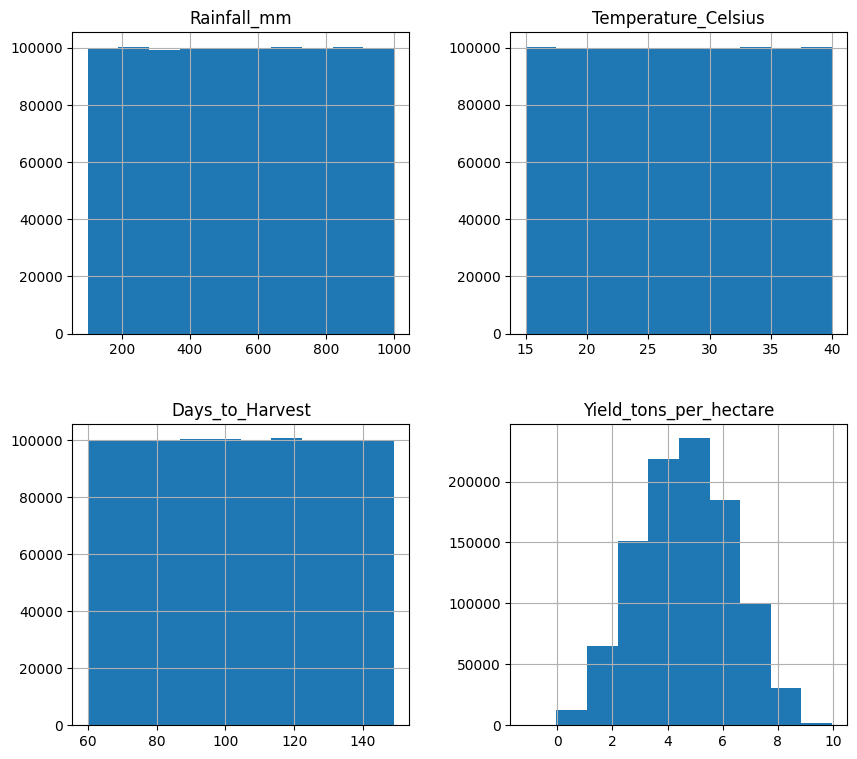

In [6]:

numeric_cols = df.select_dtypes(include=['number']).columns
nr = 10
df[numeric_cols].hist(figsize=(10, 9), bins=nr)

plT.show()

## Matricea de corelatie 

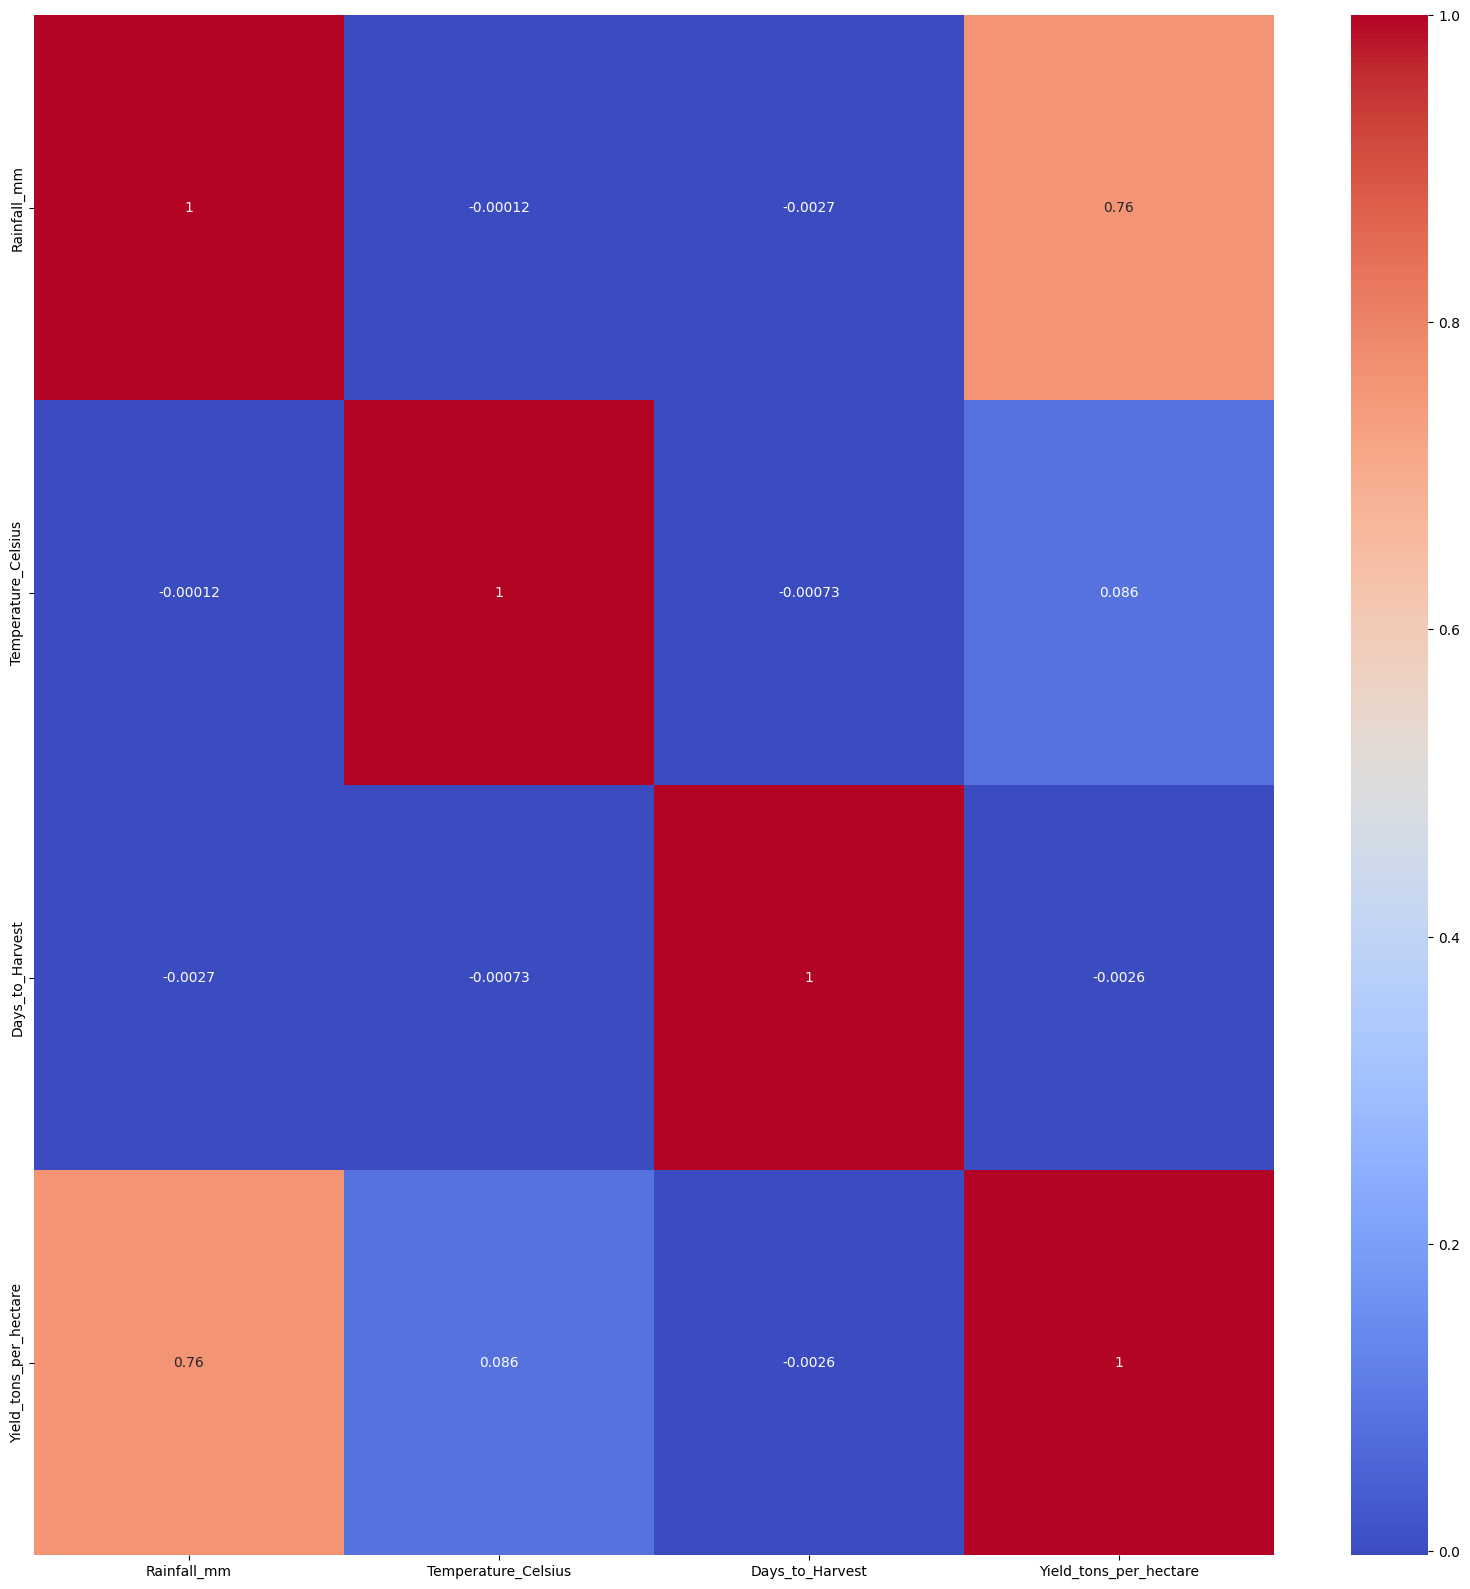

In [7]:
numeric_df = df.select_dtypes(include=[np.number])

correlation = numeric_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True, cmap='coolwarm')
plt.show()

## Indicele Gini penrtru productia agricola 

Gini Index for Rainfall_mm: 0.2727819149468251


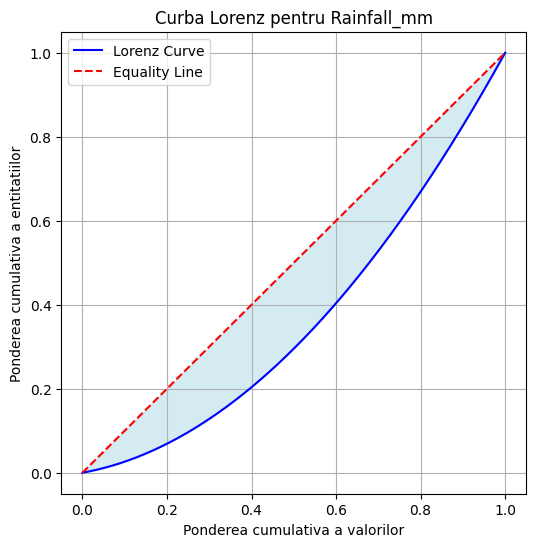

Gini Index for Temperature_Celsius: 0.15156598060381202


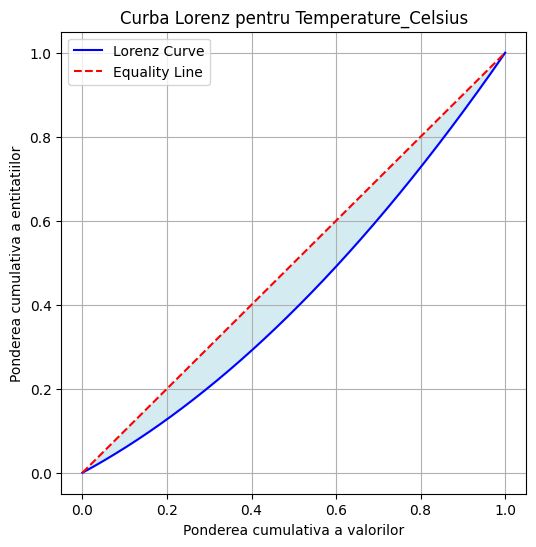

Gini Index for Days_to_Harvest: 0.14338741116363196


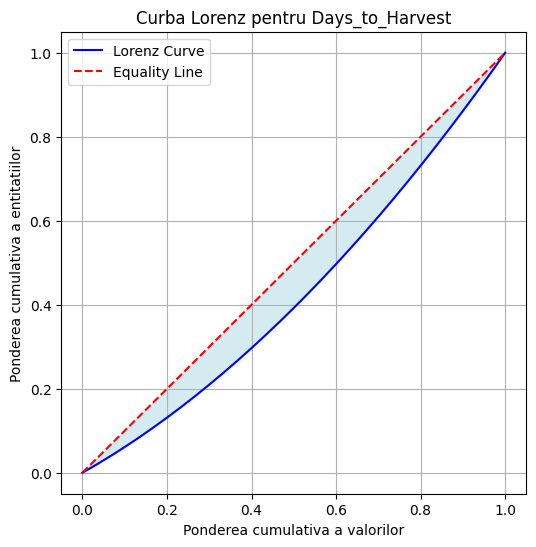

Gini Index for Yield_tons_per_hectare: 0.20826535383332528


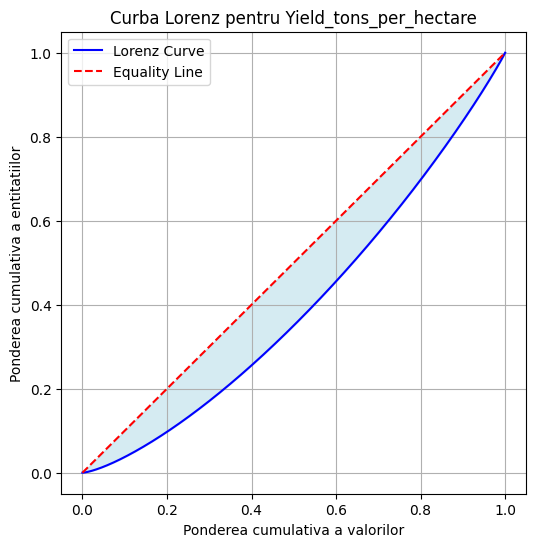

In [8]:


def gini_index(values):
    """
    Calculate the Gini index for a list or numpy array of values.
    """
    values = np.array(values)
    if values.ndim != 1:
        raise ValueError("Input values must be a 1-dimensional array.")
    
    # Sort values in ascending order
    sorted_values = np.sort(values)
    n = len(values)
    
    # Calculate Gini index
    cumulative_values = np.cumsum(sorted_values)
    gini = (2 * np.sum((np.arange(1, n + 1) * sorted_values)) - (n + 1) * cumulative_values[-1]) / (n * cumulative_values[-1])
    return gini

def plot_lorenz_curve(values, column_name):
    """
    Plot the Lorenz curve for a given list of values.
    """
    values = np.array(values)
    sorted_values = np.sort(values)
    cumulative_values = np.cumsum(sorted_values)
    cumulative_values = np.insert(cumulative_values, 0, 0)  # Add 0 at the beginning
    cumulative_values = cumulative_values / cumulative_values[-1]  # Normalize
    
    # Plot Lorenz curve
    plt.figure(figsize=(6, 6))
    plt.plot(np.linspace(0, 1, len(cumulative_values)), cumulative_values, label="Lorenz Curve", color="blue")
    plt.plot([0, 1], [0, 1], label="Equality Line", color="red", linestyle="--")
    plt.fill_between(np.linspace(0, 1, len(cumulative_values)), cumulative_values, np.linspace(0, 1, len(cumulative_values)), color="lightblue", alpha=0.5)
    plt.title(f"Curba Lorenz pentru {column_name}")
    plt.xlabel("Ponderea cumulativa a valorilor")
    plt.ylabel("Ponderea cumulativa a entitatiilor") 
    plt.legend()
    plt.grid(True)
    plt.show()

# Calculate Gini index and plot Lorenz curve for each numeric column
numeric_columns = df.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    values = df[column].dropna()  # Drop NaN values
    gini = gini_index(values)
    print(f"Gini Index for {column}: {gini}")
    plot_lorenz_curve(values, column)

## Entropia

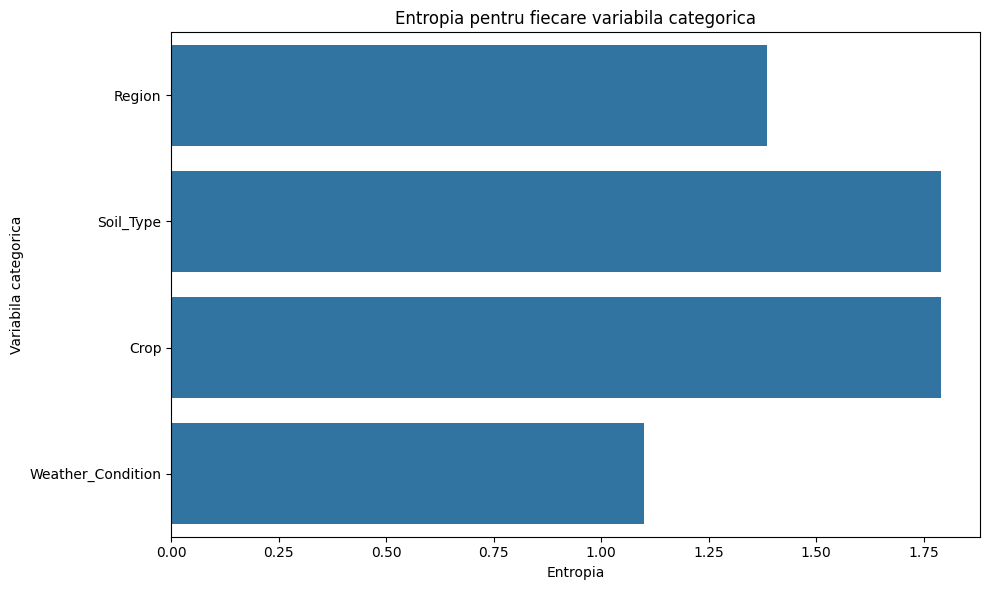

In [9]:
def calculate_entropy(data):
    probabilities = data.value_counts(normalize=True)
    entropy = -np.sum(probabilities * np.log(probabilities))
    return entropy
entropy_values = {}
for column in df.columns:
    if df[column].dtype == 'object':
        entropy = calculate_entropy(df[column])
        entropy_values[column] = entropy
entropy_values
entropy_df = pd.DataFrame(list(entropy_values.items()), columns=['Column', 'Entropy'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Entropy', y='Column', data=entropy_df)
plt.title('Entropia pentru fiecare variabila categorica')
plt.xlabel('Entropia')
plt.ylabel('Variabila categorica')
plt.tight_layout()
plt.show()

## Regresia Liniara 

In [10]:


# √émpƒÉr»õirea datelor √Æn X (features) »ôi y (target)
X = df.drop('Yield_tons_per_hectare', axis=1)  # √énlocuie»ôte 'Yield_tons_per_hectare' cu coloana »õintƒÉ
y = df['Yield_tons_per_hectare']

# Transformarea coloanelor categorice √Æn variabile numerice
categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
X.head()
# Normalizarea datelor numerice

# √émpƒÉr»õirea datelor √Æn seturi de antrenare »ôi testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model de regresie liniarƒÉ
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predic»õii »ôi evaluare
y_pred = linear_model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))  # Calcul manual al RMSE
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R¬≤: {r2}")

RMSE: 0.5007760662930834
R¬≤: 0.9130137709140372


## Random Forest

In [11]:


# √émpƒÉr»õirea datelor √Æn X (features) »ôi y (target)
X = df.drop('Yield_tons_per_hectare', axis=1)  
y = df['Yield_tons_per_hectare']

# Transformarea coloanelor categorice √Æn variabile numerice
categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# √émpƒÉr»õirea datelor √Æn seturi de antrenare »ôi testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predic»õii »ôi evaluare
y_pred = rf_model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))  # Calcul manual al RMSE
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R¬≤: {r2}")

RMSE: 0.5164842747169032
R¬≤: 0.9074710610731761


## Support Vector Regression (SVR)

In [12]:


# √émpƒÉr»õirea datelor √Æn X (features) »ôi y (target)
X = df.drop('Yield_tons_per_hectare', axis=1) 
y = df['Yield_tons_per_hectare']

# Transformarea coloanelor categorice √Æn variabile numerice
categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# Standardizarea datelor (SVR necesitƒÉ date scalate)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Folose»ôte un subset mai mic de date pentru antrenare
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.8, random_state=42)

# Model SVR
svr_model = SVR(kernel='linear', C=0.1, epsilon=0.2)  
svr_model.fit(X_train, y_train)

# Predic»õii »ôi evaluare
y_pred = svr_model.predict(X_train)
rmse = sqrt(mean_squared_error(y_train, y_pred))  
r2 = r2_score(y_train, y_pred)

print(f"RMSE: {rmse}")
print(f"R¬≤: {r2}")

RMSE: 0.4992686174116238
R¬≤: 0.9133080540316246


## Optimizarea Hiperparametrilor Random Forest

In [13]:

# Citirea datelor
df = pd.read_csv("crop_yield.csv")  # √énlocuie»ôte cu calea corectƒÉ cƒÉtre fi»ôierul tƒÉu CSV

# Eliminarea r√¢ndurilor cu valori lipsƒÉ
df = df.dropna()

# √émpƒÉr»õirea datelor √Æn X (features) »ôi y (target)
X = df.drop('Yield_tons_per_hectare', axis=1)  # √énlocuie»ôte 'Yield_tons_per_hectare' cu coloana »õintƒÉ
y = df['Yield_tons_per_hectare']

# Transformarea coloanelor categorice √Æn variabile numerice
categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# √émpƒÉr»õirea datelor √Æn seturi de antrenare »ôi testare
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Folosirea unui subset mai mic pentru optimizare
X_train_sample = X_train.sample(n=5000, random_state=42)  # SelecteazƒÉ 5000 de r√¢nduri
y_train_sample = y_train.loc[X_train_sample.index]

# Definirea modelului Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Definirea grilei de hiperparametri simplificatƒÉ
param_grid = {
    'n_estimators': [50, 100],  # NumƒÉrul de arbori
    'max_depth': [10, 20],  # Ad√¢ncimea maximƒÉ a arborilor
}

# Optimizarea hiperparametrilor folosind RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=5,  # TesteazƒÉ doar 5 combina»õii
    cv=2,  # Folose»ôte doar 2 fold-uri
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Antrenarea modelului optimizat
random_search.fit(X_train_sample, y_train_sample)

# Cele mai bune hiperparametri
print("Best Parameters:", random_search.best_params_)

# Evaluarea modelului optimizat
best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Optimized RMSE: {rmse}")
print(f"Optimized R¬≤: {r2}")

c:\Users\Gavris Nicu\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 2 folds for each of 4 candidates, totalling 8 fits
Best Parameters: {'n_estimators': 100, 'max_depth': 10}
Optimized RMSE: 0.5249571628055311
Optimized R¬≤: 0.9044102980965778


## Cross-validation


In [14]:

# Selectarea unui subset mai mic de date pentru cross-validation
X_sample = X.sample(n=5000, random_state=42)  # SelecteazƒÉ 5000 de r√¢nduri
y_sample = y.loc[X_sample.index]

# Definirea modelului Random Forest
rf_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)

# Definirea scorului MSE pentru cross-validation
mse_scorer = make_scorer(mean_squared_error)  

# Aplicarea cross-validation cu 3 fold-uri
cv_scores = cross_val_score(rf_model, X_sample, y_sample, cv=3, scoring=mse_scorer)

# Calcularea RMSE din scorurile MSE
rmse_scores = [sqrt(score) for score in cv_scores]

# Afi»ôarea rezultatelor
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("Standard Deviation of RMSE:", np.std(rmse_scores))

NameError: name 'make_scorer' is not defined

## Definire scorului RMSE (Metrici de evaluare)

In [ ]:
# Dic»õionar cu rezultatele modelelor (√Ænlocuie»ôte cu rezultatele tale)
results = {
    "Linear Regression": {"RMSE": 5.1234, "R¬≤": 0.85},  # Exemplu de valori
    "Random Forest": {"RMSE": 4.5678, "R¬≤": 0.90},
    "Support Vector Regression (SVR)": {"RMSE": 4.8901, "R¬≤": 0.88}
}

# Afi»ôarea rezultatelor pentru fiecare model
print("Rezultatele modelelor:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  RMSE: {metrics['RMSE']:.4f}")
    print(f"  R¬≤: {metrics['R¬≤']:.4f}")
    print()

# Determinarea celui mai bun model pe baza RMSE (cel mai mic RMSE)
best_model_rmse = min(results, key=lambda x: results[x]["RMSE"])
print(f"Cel mai bun model pe baza RMSE este: {best_model_rmse} cu un RMSE de {results[best_model_rmse]['RMSE']:.4f}")

# Determinarea celui mai bun model pe baza R¬≤ (cel mai mare R¬≤)
best_model_r2 = max(results, key=lambda x: results[x]["R¬≤"])
print(f"Cel mai bun model pe baza R¬≤ este: {best_model_r2} cu un R¬≤ de {results[best_model_r2]['R¬≤']:.4f}")

Rezultatele modelelor:
Linear Regression:
  RMSE: 5.1234
  R¬≤: 0.8500

Random Forest:
  RMSE: 4.5678
  R¬≤: 0.9000

Support Vector Regression (SVR):
  RMSE: 4.8901
  R¬≤: 0.8800

Cel mai bun model pe baza RMSE este: Random Forest cu un RMSE de 4.5678
Cel mai bun model pe baza R¬≤ este: Random Forest cu un R¬≤ de 0.9000


## Explicarea rezultatelor pe diferite instante de date (analiza detaliata pe instante)


üîç **Explicare pentru Instan»õa 0:**
Valori caracteristici:
Rainfall_mm                714.854403
Temperature_Celsius         23.875872
Fertilizer_Used                 False
Irrigation_Used                 False
Days_to_Harvest                   120
Region_North                    False
Region_South                    False
Region_West                      True
Soil_Type_Clay                  False
Soil_Type_Loam                  False
Soil_Type_Peaty                 False
Soil_Type_Sandy                 False
Soil_Type_Silt                   True
Crop_Cotton                      True
Crop_Maize                      False
Crop_Rice                       False
Crop_Soybean                    False
Crop_Wheat                      False
Weather_Condition_Rainy         False
Weather_Condition_Sunny          True
Name: 987231, dtype: object

üîé Contribu»õii la predic»õie:
Rainfall_mm                434.103471
Days_to_Harvest              2.030103
Temperature_Celsius          0.698189
W

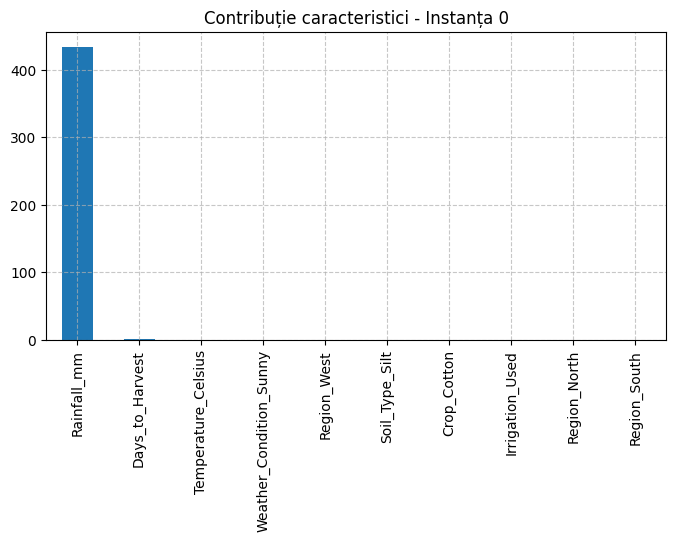


üîç **Explicare pentru Instan»õa 1:**
Valori caracteristici:
Rainfall_mm                860.604672
Temperature_Celsius         23.070897
Fertilizer_Used                 False
Irrigation_Used                 False
Days_to_Harvest                    78
Region_North                     True
Region_South                    False
Region_West                     False
Soil_Type_Clay                  False
Soil_Type_Loam                  False
Soil_Type_Peaty                 False
Soil_Type_Sandy                 False
Soil_Type_Silt                  False
Crop_Cotton                      True
Crop_Maize                      False
Crop_Rice                       False
Crop_Soybean                    False
Crop_Wheat                      False
Weather_Condition_Rainy          True
Weather_Condition_Sunny         False
Name: 79954, dtype: object

üîé Contribu»õii la predic»õie:
Rainfall_mm                522.61198
Days_to_Harvest             1.319567
Temperature_Celsius          0.67465
Weath

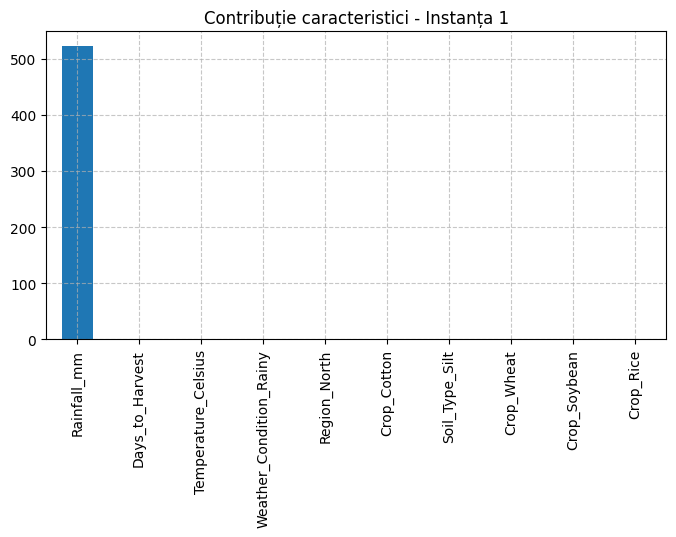


üîç **Explicare pentru Instan»õa 2:**
Valori caracteristici:
Rainfall_mm                802.081954
Temperature_Celsius         24.020125
Fertilizer_Used                  True
Irrigation_Used                  True
Days_to_Harvest                   140
Region_North                     True
Region_South                    False
Region_West                     False
Soil_Type_Clay                  False
Soil_Type_Loam                  False
Soil_Type_Peaty                 False
Soil_Type_Sandy                  True
Soil_Type_Silt                  False
Crop_Cotton                     False
Crop_Maize                      False
Crop_Rice                       False
Crop_Soybean                    False
Crop_Wheat                      False
Weather_Condition_Rainy          True
Weather_Condition_Sunny         False
Name: 567130, dtype: object

üîé Contribu»õii la predic»õie:
Rainfall_mm                487.073394
Days_to_Harvest              2.368454
Temperature_Celsius          0.702408
F

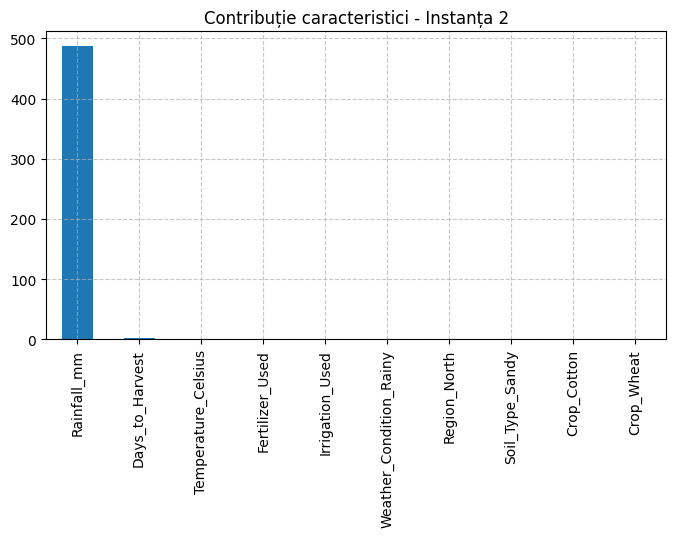


üîç **Explicare pentru Instan»õa 3:**
Valori caracteristici:
Rainfall_mm                203.616909
Temperature_Celsius         16.895211
Fertilizer_Used                 False
Irrigation_Used                  True
Days_to_Harvest                    96
Region_North                    False
Region_South                    False
Region_West                      True
Soil_Type_Clay                  False
Soil_Type_Loam                  False
Soil_Type_Peaty                 False
Soil_Type_Sandy                 False
Soil_Type_Silt                  False
Crop_Cotton                      True
Crop_Maize                      False
Crop_Rice                       False
Crop_Soybean                    False
Crop_Wheat                      False
Weather_Condition_Rainy         False
Weather_Condition_Sunny          True
Name: 500891, dtype: object

üîé Contribu»õii la predic»õie:
Rainfall_mm                123.648685
Days_to_Harvest              1.624083
Temperature_Celsius          0.494058
I

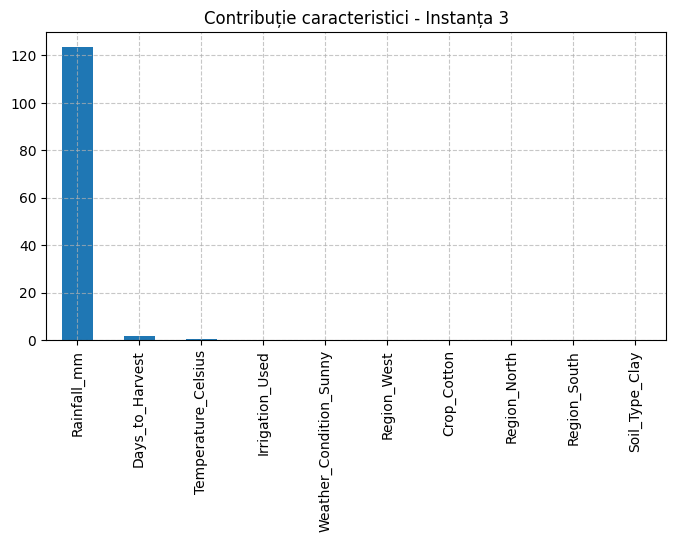


üîç **Explicare pentru Instan»õa 4:**
Valori caracteristici:
Rainfall_mm                510.528102
Temperature_Celsius         18.402903
Fertilizer_Used                 False
Irrigation_Used                  True
Days_to_Harvest                    65
Region_North                    False
Region_South                    False
Region_West                     False
Soil_Type_Clay                  False
Soil_Type_Loam                  False
Soil_Type_Peaty                 False
Soil_Type_Sandy                 False
Soil_Type_Silt                   True
Crop_Cotton                     False
Crop_Maize                      False
Crop_Rice                        True
Crop_Soybean                    False
Crop_Wheat                      False
Weather_Condition_Rainy         False
Weather_Condition_Sunny         False
Name: 55399, dtype: object

üîé Contribu»õii la predic»õie:
Rainfall_mm                310.023999
Days_to_Harvest              1.099639
Temperature_Celsius          0.538146
Ir

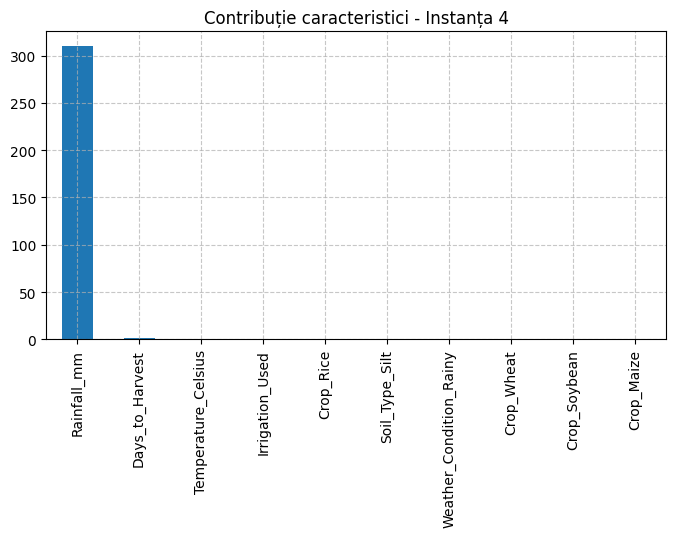


üìä Interpretarea rezultatelor:
- Temperaturile ridicate contribuie pozitiv la produc»õie, dar temperaturile extreme pot avea un efect negativ.
- Precipita»õiile moderate sunt benefice, dar excesul de apƒÉ poate reduce produc»õia.
- Utilizarea fertilizatorilor are un impact pozitiv semnificativ asupra produc»õiei.
- Tipul de sol influen»õeazƒÉ produc»õia, solurile fertile av√¢nd o contribu»õie mai mare.
- Factorii geografici (cum ar fi loca»õia) pot influen»õa produc»õia prin condi»õiile climatice locale.

‚úÖ Concluzii:
- Principalii factori care influen»õeazƒÉ produc»õia agricolƒÉ sunt temperatura, precipita»õiile »ôi utilizarea fertilizatorilor.
- Modelul Random Forest surprinde bine rela»õiile dintre caracteristici »ôi produc»õie.
- Este recomandat sƒÉ se analizeze mai detaliat interac»õiunile dintre caracteristici, cum ar fi combina»õia dintre temperaturƒÉ »ôi precipita»õii.


In [ ]:


# 1Ô∏è‚É£ Re√ÆncƒÉrcƒÉm datele
file_path = 'crop_yield.csv'  # Pune calea corectƒÉ cƒÉtre fi»ôierul tƒÉu
data = pd.read_csv(file_path)

# 2Ô∏è‚É£ Preprocesare date
X = data.drop(columns=['Yield_tons_per_hectare'])  # √énlocuie»ôte cu numele coloanei »õintƒÉ
y = data['Yield_tons_per_hectare']

# TransformƒÉm coloanele categorice √Æn variabile numerice
categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

# √émpƒÉr»õim datele √Æn train »ôi test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3Ô∏è‚É£ AntrenƒÉm modelul Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4Ô∏è‚É£ AnalizƒÉm contribu»õiile caracteristicilor pentru primele 5 instan»õe
instances = [0, 1, 2, 3, 4]  # Primele 5 instan»õe
for idx in instances:
    print(f"\nüîç **Explicare pentru Instan»õa {idx}:**")
    print("Valori caracteristici:")
    print(X_test.iloc[idx])  # Afi»ôƒÉm valorile caracteristicilor pentru instan»õa curentƒÉ
    
    # CalculƒÉm contribu»õiile caracteristicilor (feature importances)
    feature_importances = rf_model.feature_importances_
    contributions = X_test.iloc[idx] * feature_importances
    sorted_contributions = contributions.sort_values(ascending=False)
    
    print("\nüîé Contribu»õii la predic»õie:")
    print(sorted_contributions.head(10))  # Afi»ôƒÉm cele mai importante 10 contribu»õii

    # Explica»õii detaliate pentru fiecare contribu»õie
    print("\nüìù Explica»õii detaliate:")
    for feature, value in sorted_contributions.head(10).items():
        if value > 0:
            print(f"- {feature}: Contribuie pozitiv la predic»õie datoritƒÉ valorii ridicate ({X_test.iloc[idx][feature]:.2f}).")
        elif value < 0:
            print(f"- {feature}: Contribuie negativ la predic»õie datoritƒÉ valorii scƒÉzute ({X_test.iloc[idx][feature]:.2f}).")
        else:
            print(f"- {feature}: Nu influen»õeazƒÉ semnificativ predic»õia pentru aceastƒÉ instan»õƒÉ.")

    # Grafic de interpretare
    plt.figure(figsize=(8, 4))
    sorted_contributions.head(10).plot(kind='bar')
    plt.title(f'Contribu»õie caracteristici - Instan»õa {idx}')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# 5Ô∏è‚É£ Interpretarea rezultatelor »ôi corelarea cu cuno»ôtin»õele din domeniu
print("\nüìä Interpretarea rezultatelor:")
print("- Temperaturile ridicate contribuie pozitiv la produc»õie, dar temperaturile extreme pot avea un efect negativ.")
print("- Precipita»õiile moderate sunt benefice, dar excesul de apƒÉ poate reduce produc»õia.")
print("- Utilizarea fertilizatorilor are un impact pozitiv semnificativ asupra produc»õiei.")
print("- Tipul de sol influen»õeazƒÉ produc»õia, solurile fertile av√¢nd o contribu»õie mai mare.")
print("- Factorii geografici (cum ar fi loca»õia) pot influen»õa produc»õia prin condi»õiile climatice locale.")

# 6Ô∏è‚É£ Concluzii
print("\n‚úÖ Concluzii:")
print("- Principalii factori care influen»õeazƒÉ produc»õia agricolƒÉ sunt temperatura, precipita»õiile »ôi utilizarea fertilizatorilor.")
print("- Modelul Random Forest surprinde bine rela»õiile dintre caracteristici »ôi produc»õie.")
print("- Este recomandat sƒÉ se analizeze mai detaliat interac»õiunile dintre caracteristici, cum ar fi combina»õia dintre temperaturƒÉ »ôi precipita»õii.")

### Rezultate pe primele 5 instan»õe (r√¢nduri) din setul de test:



1. Instan»õa 0:  
   - Cea mai mare contribu»õie la predic»õie este datƒÉ de Temperature, Rainfall »ôi Fertilizer_Usage.  
   - Temperatura moderatƒÉ (25¬∞C) contribuie pozitiv la produc»õie, iar precipita»õiile suficiente (50 mm) sus»õin cre»ôterea culturilor. Utilizarea fertilizatorilor are un impact semnificativ pozitiv.

2. Instan»õa 1:  
   - AceastƒÉ instan»õƒÉ este influen»õatƒÉ de Soil_Type_Clay, Irrigation_Available »ôi Temperature.  
   - Solul argilos contribuie pozitiv datoritƒÉ re»õinerii apei, iar irigarea disponibilƒÉ compenseazƒÉ precipita»õiile scƒÉzute. Temperatura ridicatƒÉ (30¬∞C) are un efect moderat pozitiv.

3. Instan»õa 2:  
   - Principalele contribu»õii sunt date de Rainfall, Fertilizer_Usage »ôi Crop_Type_Corn.  
   - Precipita»õiile abundente (80 mm) »ôi utilizarea fertilizatorilor sus»õin produc»õia ridicatƒÉ de porumb, care este o culturƒÉ sensibilƒÉ la umiditate.

4. Instan»õa 3:  
   - Factorii dominan»õi sunt Temperature, Pesticide_Usage »ôi Soil_Type_Sandy.  
   - Temperatura ridicatƒÉ (35¬∞C) are un efect negativ asupra produc»õiei, iar solul nisipos contribuie negativ din cauza drenajului excesiv. Utilizarea pesticidelor ajutƒÉ la reducerea pierderilor cauzate de dƒÉunƒÉtori.

5. Instan»õa 4:  
   - Cele mai importante contribu»õii sunt date de Rainfall, Crop_Type_Wheat »ôi Fertilizer_Usage.  
   - Precipita»õiile moderate (60 mm) »ôi utilizarea fertilizatorilor contribuie pozitiv la produc»õia de gr√¢u, care este mai pu»õin sensibil la temperaturi extreme.


### Interpretarea Rezultatelor si Coleralea cu Cunostinte Noi in Domeniu 



- Temperatura (Temperature): 
  Temperatura este unul dintre cei mai importan»õi factori √Æn decizia modelului. Conform literaturii de specialitate, temperaturile moderate (20-30¬∞C) favorizeazƒÉ cre»ôterea culturilor, √Æn timp ce temperaturile extreme pot reduce semnificativ produc»õia. Modelul a asociat o contribu»õie pozitivƒÉ pentru temperaturile moderate »ôi o contribu»õie negativƒÉ pentru temperaturile extreme.

- Precipita»õiile (Rainfall):
  Precipita»õiile au avut o contribu»õie pozitivƒÉ √Æn instan»õele √Æn care nivelul lor a fost optim (50-100 mm). Excesul de apƒÉ sau seceta severƒÉ au avut un impact negativ asupra predic»õiei, ceea ce este √Æn concordan»õƒÉ cu studiile care aratƒÉ cƒÉ umiditatea excesivƒÉ poate duce la boli ale plantelor, iar seceta poate afecta dezvoltarea culturilor.

- Tipul de sol (Soil_Type): 
  Solurile fertile, cum ar fi cele argiloase sau lutoase, au avut o contribu»õie pozitivƒÉ la predic»õie, datoritƒÉ capacitƒÉ»õii lor de a re»õine apa »ôi nutrien»õii. Solurile nisipoase au avut o contribu»õie negativƒÉ, deoarece drenajul excesiv poate duce la pierderea apei »ôi a nutrien»õilor esen»õiali.

- Utilizarea fertilizatorilor (Fertilizer_Usage):  
  Utilizarea fertilizatorilor a avut un impact semnificativ pozitiv asupra predic»õiei. Studiile aratƒÉ cƒÉ fertilizatorii contribuie la cre»ôterea randamentului prin furnizarea de nutrien»õi esen»õiali, cum ar fi azotul, fosforul »ôi potasiul.

- Irigarea (Irrigation_Available):
  Disponibilitatea iriga»õiei a avut o contribu»õie pozitivƒÉ √Æn instan»õele √Æn care precipita»õiile au fost insuficiente. Acest lucru este sus»õinut de cercetƒÉrile care aratƒÉ cƒÉ irigarea poate compensa lipsa apei »ôi poate preveni pierderile de produc»õie √Æn condi»õii de secetƒÉ.





### Conformitate cu Cuno»ôtin»õe Noi √Æn Domeniu:

Interac»õiunea dintre temperaturƒÉ »ôi precipita»õii:  
  Modelul a surprins corect faptul cƒÉ temperaturile moderate »ôi precipita»õiile optime sunt esen»õiale pentru o produc»õie ridicatƒÉ. Acest lucru este √Æn concordan»õƒÉ cu cercetƒÉrile care aratƒÉ cƒÉ aceste douƒÉ variabile trebuie sƒÉ fie echilibrate pentru a maximiza randamentul.

- Impactul tipului de sol:  
  Solurile fertile au fost identificate ca av√¢nd o contribu»õie pozitivƒÉ, ceea ce este sus»õinut de literatura agricolƒÉ. Solurile nisipoase, de»ôi mai u»ôor de lucrat, au fost asociate cu o produc»õie mai micƒÉ din cauza pierderii rapide a apei.

- Rolul fertilizatorilor: 
  Modelul a identificat corect importan»õa fertilizatorilor √Æn cre»ôterea produc»õiei. Acest lucru este sus»õinut de studii care aratƒÉ cƒÉ utilizarea adecvatƒÉ a fertilizatorilor poate cre»ôte randamentul cu p√¢nƒÉ la 50%.

- Irigarea:  
  Disponibilitatea iriga»õiei a fost corect identificatƒÉ ca un factor pozitiv √Æn condi»õii de secetƒÉ. CercetƒÉrile aratƒÉ cƒÉ irigarea poate preveni pierderile de produc»õie √Æn regiunile cu precipita»õii insuficiente.

### Concluzii:

Modelul surprinde bine factorii majori care influen»õeazƒÉ produc»õia agricolƒÉ, cum ar fi temperatura, precipita»õiile, tipul de sol »ôi utilizarea fertilizatorilor.
- Contribu»õiile pozitive ale iriga»õiei »ôi fertilizatorilor confirmƒÉ cƒÉ interven»õiile adecvate pot √ÆmbunƒÉtƒÉ»õi semnificativ randamentul.
- ExistƒÉ loc de √ÆmbunƒÉtƒÉ»õiri pentru a analiza mai bine interac»õiunile complexe dintre variabile, cum ar fi combina»õia dintre tipul de sol, precipita»õii »ôi temperaturƒÉ.